In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

covid_raw = pd.read_csv("/workspace/notebooks/korea_covid_raw_20250923_025636.csv")

covid_raw.head(5)

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index,collected_at,data_source,collector
0,South Korea,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.726997,45560.125,0.248765,6.8,NaN,12.43,NaN,2025-09-23 02:56:36.408290,OWID,최해혁
1,South Korea,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.726997,45560.125,0.248765,6.8,NaN,12.43,NaN,2025-09-23 02:56:36.408290,OWID,최해혁
2,South Korea,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.726997,45560.125,0.248765,6.8,NaN,12.43,NaN,2025-09-23 02:56:36.408290,OWID,최해혁
3,South Korea,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,82.726997,45560.125,0.248765,6.8,NaN,12.43,NaN,2025-09-23 02:56:36.408290,OWID,최해혁
4,South Korea,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,82.726997,45560.125,0.248765,6.8,NaN,12.43,NaN,2025-09-23 02:56:36.408290,OWID,최해혁


In [44]:
print(covid_raw.shape)

(2067, 64)


In [45]:
covid_raw.isnull().sum()

country                          0
date                             0
total_cases                      7
new_cases                        7
new_cases_smoothed              12
                              ... 
hospital_beds_per_thousand       0
human_development_index       2067
collected_at                     0
data_source                      0
collector                        0
Length: 64, dtype: int64

In [46]:
covid_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 64 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country                                     2067 non-null   object 
 1   date                                        2067 non-null   object 
 2   total_cases                                 2060 non-null   float64
 3   new_cases                                   2060 non-null   float64
 4   new_cases_smoothed                          2055 non-null   float64
 5   total_cases_per_million                     2060 non-null   float64
 6   new_cases_per_million                       2060 non-null   float64
 7   new_cases_smoothed_per_million              2055 non-null   float64
 8   total_deaths                                2060 non-null   float64
 9   new_deaths                                  2059 non-null   float64
 10  new_deaths_s

In [47]:
covid_raw.describe()

,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
count,2.060000e+03,2060.000000,2055.000000,2060.000000,2060.000000,2055.000000,2060.000000,2059.000000,2055.000000,2060.000000,...,2067.0,2067.000000,2067.000,2067.000000,2067.000,2.067000e+03,2067.0,0.0,2067.00,0.0
mean,1.897219e+07,16782.462621,16823.295849,366382.418917,324.095425,324.883979,21031.628641,17.455561,17.493628,406.153416,...,51782473.0,530.558105,43.944,82.726997,45560.125,2.487649e-01,6.8,NaN,12.43,NaN
std,1.562438e+07,51809.476725,47825.539395,301730.977037,1000.521482,923.585467,15815.363929,51.926879,45.816690,305.419242,...,0.0,0.000000,0.000,0.000000,0.000,2.776229e-17,0.0,NaN,0.00,NaN
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,51782473.0,530.558105,43.944,82.726997,45560.125,2.487649e-01,6.8,NaN,12.43,NaN
25%,1.419848e+05,0.000000,0.000000,2741.946200,0.000000,0.000000,1967.250000,0.000000,0.000000,37.990656,...,51782473.0,530.558105,43.944,82.726997,45560.125,2.487649e-01,6.8,NaN,12.43,NaN
50%,2.552154e+07,110.000000,375.714300,492860.660000,2.124271,7.255627,29203.000000,1.000000,2.142857,563.955300,...,51782473.0,530.558105,43.944,82.726997,45560.125,2.487649e-01,6.8,NaN,12.43,NaN
75%,3.457187e+07,5844.000000,10500.857500,667636.560000,112.856715,202.787860,35934.000000,11.000000,13.142858,693.941350,...,51782473.0,530.558105,43.944,82.726997,45560.125,2.487649e-01,6.8,NaN,12.43,NaN
max,3.457187e+07,621328.000000,404999.560000,667636.560000,11998.809000,7821.171000,35934.000000,1026.000000,359.428560,693.941350,...,51782473.0,530.558105,43.944,82.726997,45560.125,2.487649e-01,6.8,NaN,12.43,NaN


In [48]:
# "date"컬럼을 datetime 타입으로 변환
covid_raw["date"] = pd.to_datetime(covid_raw["date"])

In [49]:
# 년, 월, 일 컬럼 추가
covid_raw["year"] = covid_raw["date"].dt.year
covid_raw["month"] = covid_raw["date"].dt.month
covid_raw["day"] = covid_raw["date"].dt.day

In [50]:
# 결측치 비율이 50% 이상인 컬럼 제거

# 컬럼 별 결측치 비율 계산
missing_ratio = covid_raw.isnull().sum() / len(covid_raw)
print("\n===== 컬럼별 결측치 비율 =====")
print(missing_ratio)

# 제거할 컬럼 확인(결측치 비율 50% 이상)
threshold = 0.5
cols_to_drop = missing_ratio[missing_ratio > threshold].index
print(f"\n===== 제거할 컬럼 (결측치 비율 > {threshold}) =====")
print(cols_to_drop)

# 해당 컬럼 제거
covid_dropped = covid_raw.drop(cols_to_drop, axis=1)

print("\n===== 결측치 많은 컬럼 제거 후 =====")
covid_dropped.info()


===== 컬럼별 결측치 비율 =====
country               0.000000
date                  0.000000
total_cases           0.003387
new_cases             0.003387
new_cases_smoothed    0.005806
                        ...   
data_source           0.000000
collector             0.000000
year                  0.000000
month                 0.000000
day                   0.000000
Length: 67, dtype: float64

===== 제거할 컬럼 (결측치 비율 > 0.5) =====
Index(['excess_mortality', 'excess_mortality_cumulative',
       'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       '

In [51]:
# 누적 수치 컬럼의 결측치는 이전 행의 정보로 대체

# "total"이 포함된 컬럼명 리스트 생성
cols_to_fill = [col for col in covid_dropped.columns if 'total' in col]
print(f"\n>> 처리할 컬럼: {cols_to_fill}")

# 해당 컬럼들에 대해서만 ffill 실행한 후 bfill 실행
covid_dropped[cols_to_fill] = covid_dropped[cols_to_fill].bfill().ffill()

print("\n===== 처리 후 =====")
covid_dropped.info()


>> 처리할 컬럼: ['total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million']

===== 처리 후 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   country                          2067 non-null   object        
 1   date                             2067 non-null   datetime64[ns]
 2   total_cases                      2067 non-null   float64       
 3   new_cases                        2060 non-null   float64       
 4   new_cases_smoothed               2055 non-null   float64       
 5   total_cases_per_million          2067 non-null   float64       
 6   new_cases_per_million            2060 non-null   float64       
 7   new_cases_smoothed_per_million   2055 non-null   float64       
 8   total_deaths                     2067 non-null   float64       
 9   new_deaths  

In [52]:
# 숫자형이 아닌 컬럼들 중 의미없는 컬럼 삭제
covid_del = covid_dropped.drop(columns = ["collected_at", "data_source", "collector"])

covid_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   country                          2067 non-null   object        
 1   date                             2067 non-null   datetime64[ns]
 2   total_cases                      2067 non-null   float64       
 3   new_cases                        2060 non-null   float64       
 4   new_cases_smoothed               2055 non-null   float64       
 5   total_cases_per_million          2067 non-null   float64       
 6   new_cases_per_million            2060 non-null   float64       
 7   new_cases_smoothed_per_million   2055 non-null   float64       
 8   total_deaths                     2067 non-null   float64       
 9   new_deaths                       2059 non-null   float64       
 10  new_deaths_smoothed              2055 non-null   float64    

In [53]:
# 국가, 대륙 등과 같은 명목 데이터는 원-핫 인코딩 적용
covid_encoded = pd.get_dummies(covid_del, columns = ["country", "code", "continent"])

covid_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             2067 non-null   datetime64[ns]
 1   total_cases                      2067 non-null   float64       
 2   new_cases                        2060 non-null   float64       
 3   new_cases_smoothed               2055 non-null   float64       
 4   total_cases_per_million          2067 non-null   float64       
 5   new_cases_per_million            2060 non-null   float64       
 6   new_cases_smoothed_per_million   2055 non-null   float64       
 7   total_deaths                     2067 non-null   float64       
 8   new_deaths                       2059 non-null   float64       
 9   new_deaths_smoothed              2055 non-null   float64       
 10  total_deaths_per_million         2067 non-null   float64    

In [54]:
# 나머지 결측치에 대해 선형보간
covid_filled = covid_encoded.interpolate(method="linear").bfill().ffill()

covid_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             2067 non-null   datetime64[ns]
 1   total_cases                      2067 non-null   float64       
 2   new_cases                        2067 non-null   float64       
 3   new_cases_smoothed               2067 non-null   float64       
 4   total_cases_per_million          2067 non-null   float64       
 5   new_cases_per_million            2067 non-null   float64       
 6   new_cases_smoothed_per_million   2067 non-null   float64       
 7   total_deaths                     2067 non-null   float64       
 8   new_deaths                       2067 non-null   float64       
 9   new_deaths_smoothed              2067 non-null   float64       
 10  total_deaths_per_million         2067 non-null   float64    

In [55]:
covid_filled.head()

,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,diabetes_prevalence,hospital_beds_per_thousand,year,month,day,country_South Korea,code_KOR,continent_Asia
0,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45560.125,0.248765,6.8,12.43,2020,1,1,True,True,True
1,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45560.125,0.248765,6.8,12.43,2020,1,2,True,True,True
2,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45560.125,0.248765,6.8,12.43,2020,1,3,True,True,True
3,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45560.125,0.248765,6.8,12.43,2020,1,4,True,True,True
4,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45560.125,0.248765,6.8,12.43,2020,1,5,True,True,True


In [56]:
# 최근 2년간 0인 값이 50%가 넘 컬럼을 찾아 제거

latest_date = covid_filled["date"].max() # 데이터의 가장 마지막 날짜 확인
two_years_ago = latest_date - pd.Timedelta(days = 730) # 마지막 날짜로부터 2년 전 날짜 계산

print(f"데이터의 마지막 날짜: {latest_date.date()}")
print(f"분석 기준 시작 날짜 (2년 전): {two_years_ago.date()}")

last_two_years_data = covid_filled[covid_filled["date"] >= two_years_ago] # 최근 2년 데이터 필터링

numeric_cols = last_two_years_data.select_dtypes(include = np.number) # 숫자형 컬럼만 선택하여 0인지 여부 확인
zero_ratio = (numeric_cols == 0).mean()

threshold = 0.5
cols_to_drop = zero_ratio[zero_ratio > threshold].index.tolist() # 0인 값이 50% 이상인 컬럼 이름 리트스 추출

print(f"\n제거 전 데이터 형태: {covid_filled.shape}")
covid_final = covid_filled.drop(columns = cols_to_drop)
print(f"제거 후 데이터 형태: {covid_final.shape}")

print("\n===== 컬럼 제거 완료 =====")

covid_final.info()

데이터의 마지막 날짜: 2025-09-21
분석 기준 시작 날짜 (2년 전): 2023-09-22

제거 전 데이터 형태: (2067, 31)
제거 후 데이터 형태: (2067, 23)

===== 컬럼 제거 완료 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        2067 non-null   datetime64[ns]
 1   total_cases                 2067 non-null   float64       
 2   total_cases_per_million     2067 non-null   float64       
 3   total_deaths                2067 non-null   float64       
 4   total_deaths_per_million    2067 non-null   float64       
 5   icu_patients                2067 non-null   float64       
 6   icu_patients_per_million    2067 non-null   float64       
 7   stringency_index            2067 non-null   float64       
 8   reproduction_rate           2067 non-null   float64       
 9   population                  2067 non-null   int64         

In [61]:
output_path = "/workspace/data/processed/covid_processed.csv"

covid_final.to_csv(output_path, index=False)
print(f"파일이 성공적으로 저장되었습니다: {output_path}")

파일이 성공적으로 저장되었습니다: /workspace/data/processed/covid_processed.csv


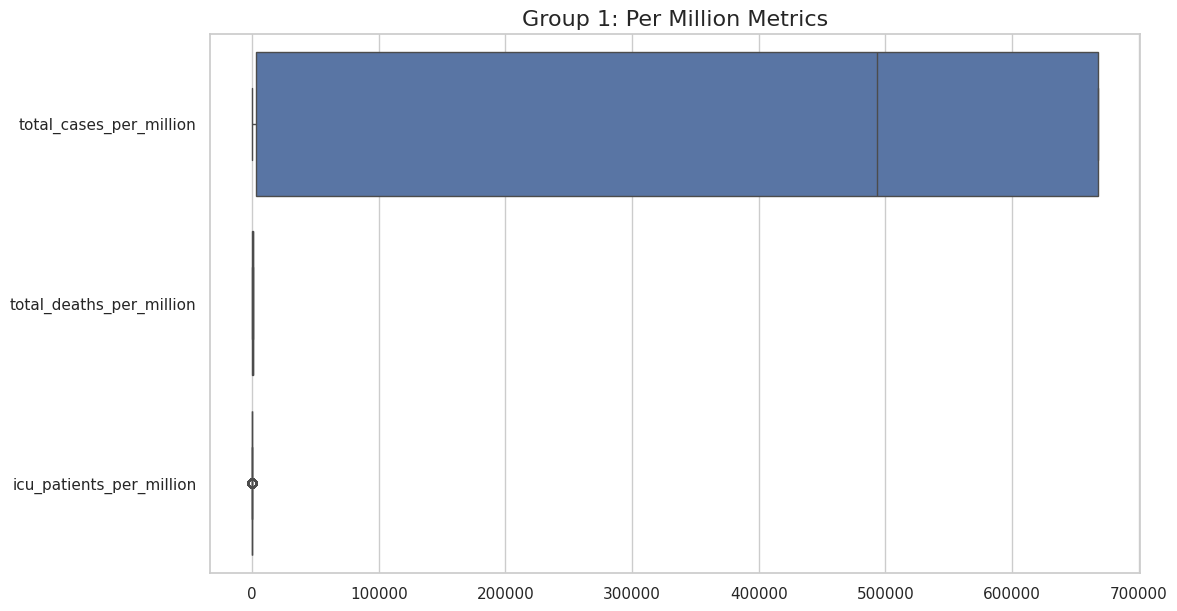

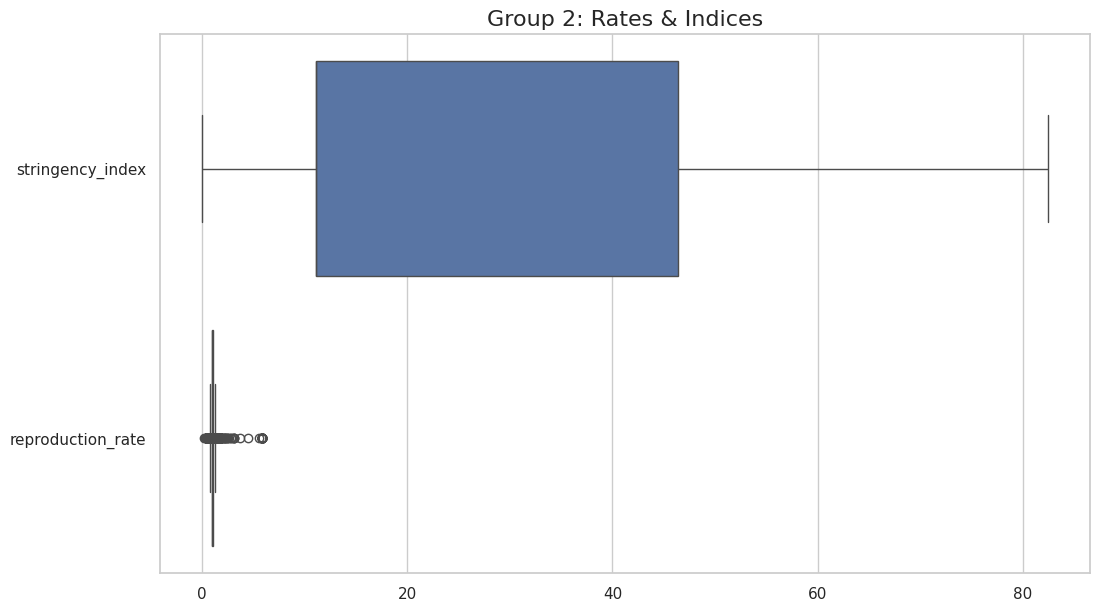

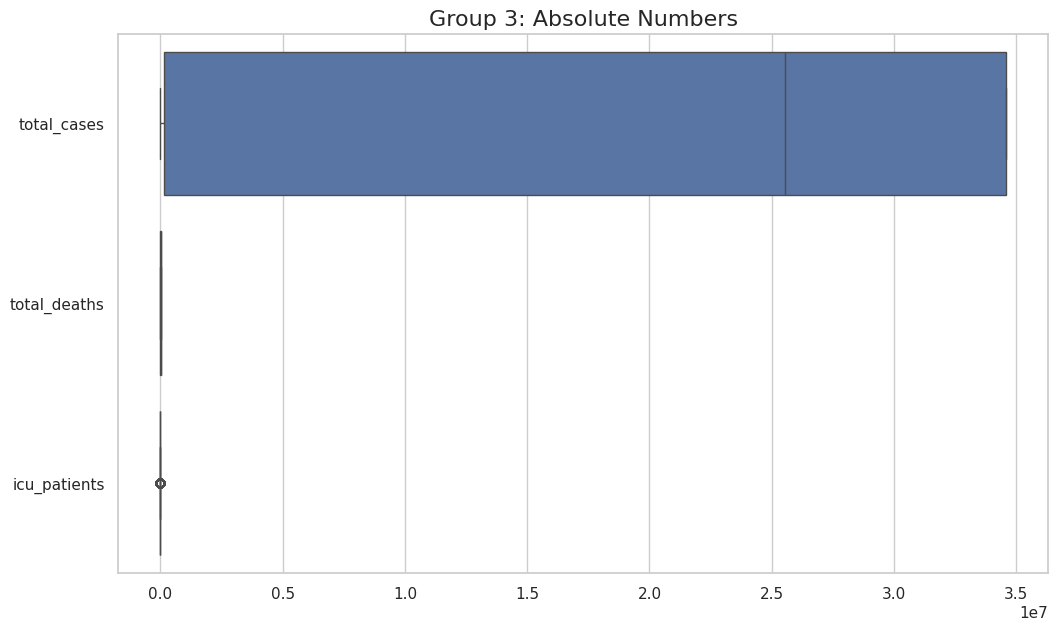

In [ ]:
# 한글 폰트 설정 (필요 시)
# plt.rc('font', family='Malgun Gothic')
sns.set_theme(style="whitegrid")

# --- 그룹 1: 백만 명당 지표 ---
plt.figure(figsize=(12, 7))
group1_cols = ['total_cases_per_million', 'total_deaths_per_million', 'icu_patients_per_million']
sns.boxplot(data=covid_final[group1_cols], orient='h')
plt.title('Group 1: Per Million Metrics', fontsize=16)
plt.show()

# --- 그룹 2: 비율 및 지수 ---
plt.figure(figsize=(12, 7))
group2_cols = ['stringency_index', 'reproduction_rate']
sns.boxplot(data=covid_final[group2_cols], orient='h')
plt.title('Group 2: Rates & Indices', fontsize=16)
plt.show()

# --- 그룹 3: 절대 수치 지표 ---
plt.figure(figsize=(12, 7))
group3_cols = ['total_cases', 'total_deaths', 'icu_patients']
sns.boxplot(data=covid_final[group3_cols], orient='h')
plt.title('Group 3: Absolute Numbers', fontsize=16)
plt.show()

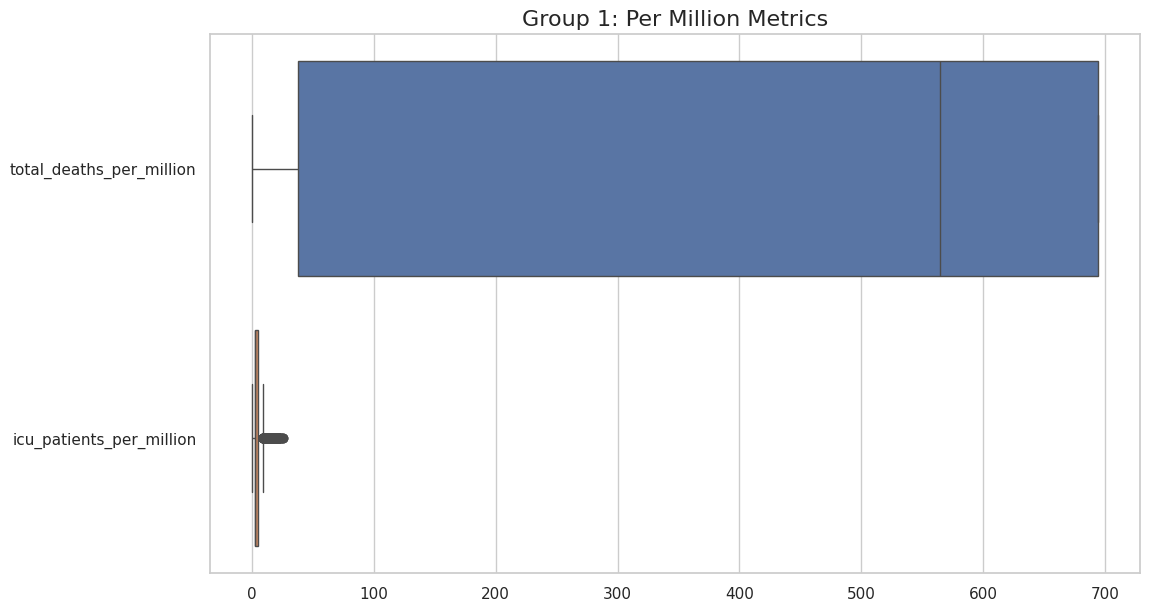

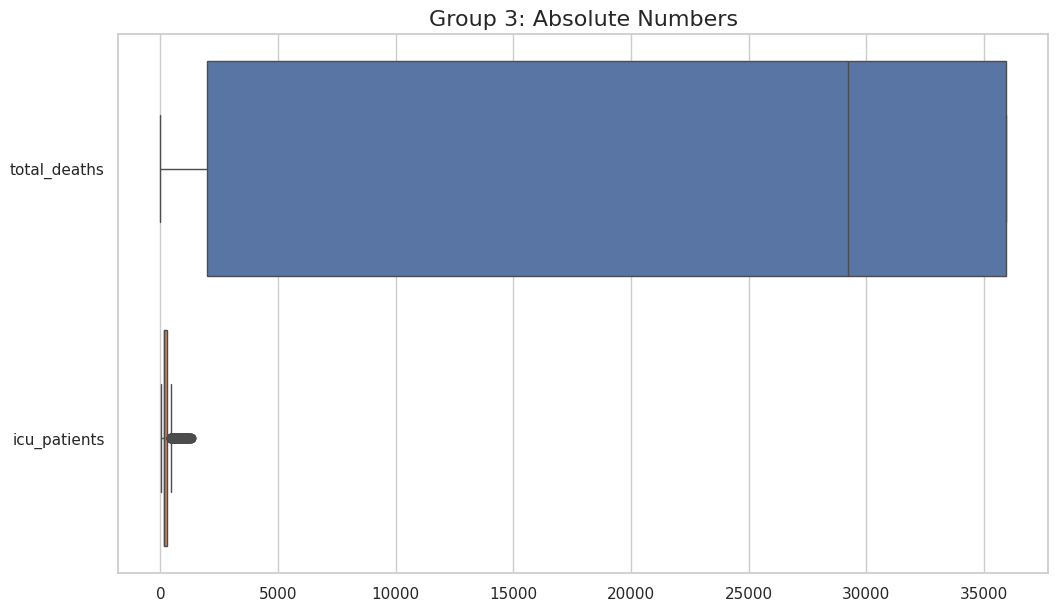

In [63]:
# --- 그룹 1: 백만 명당 지표 ---
plt.figure(figsize=(12, 7))
group1_cols = ['total_deaths_per_million', 'icu_patients_per_million']
sns.boxplot(data=covid_final[group1_cols], orient='h')
plt.title('Group 1: Per Million Metrics', fontsize=16)
plt.show()

plt.figure(figsize=(12, 7))
group3_cols = ['total_deaths', 'icu_patients']
sns.boxplot(data=covid_final[group3_cols], orient='h')
plt.title('Group 3: Absolute Numbers', fontsize=16)
plt.show()

In [64]:
# IQR 기준으로 이상치 경계 계산
q1 = covid_final['reproduction_rate'].quantile(0.25)
q3 = covid_final['reproduction_rate'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

# 이상치에 해당하는 데이터만 필터링하여 확인
outliers = covid_final[covid_final['reproduction_rate'] > upper_bound]
print(f"상위 이상치 경계값: {upper_bound}")
print("감염재생산지수 이상치 발생 시점 Top 10:")
print(outliers.sort_values('reproduction_rate', ascending=False).head(10)[['date', 'reproduction_rate']])

상위 이상치 경계값: 1.2172
감염재생산지수 이상치 발생 시점 Top 10:
         date  reproduction_rate
30 2020-01-31             5.8715
31 2020-02-01             5.8715
29 2020-01-30             5.8715
28 2020-01-29             5.8715
26 2020-01-27             5.8715
27 2020-01-28             5.8715
19 2020-01-20             5.8715
18 2020-01-19             5.8715
25 2020-01-26             5.8715
24 2020-01-25             5.8715


In [65]:
def analyze_high_outliers(dataframe, column_name):
    """
    데이터프레임과 컬럼명을 받아 IQR 기준으로 상위 이상치를 분석하고,
    가장 높은 값 10개를 날짜와 함께 출력하는 함수
    """
    print(f"===== [ {column_name} ] 컬럼 이상치 분석 =====")
    
    # 1. IQR 및 이상치 경계 계산
    q1 = dataframe[column_name].quantile(0.25)
    q3 = dataframe[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr

    # 2. 이상치에 해당하는 데이터만 필터링
    outliers = dataframe[dataframe[column_name] > upper_bound]
    
    print(f"상위 이상치 경계값: {upper_bound:.2f}")

    # 3. 이상치 결과 출력
    if outliers.empty:
        print(">> 분석 기간 내 상위 이상치가 발견되지 않았습니다.")
    else:
        print(f">> 발견된 상위 이상치 개수: {len(outliers)}개")
        print(">> 이상치 발생 시점 Top 10:")
        # 날짜와 해당 컬럼 값을 내림차순으로 정렬하여 상위 10개 출력
        top_10_outliers = outliers.sort_values(column_name, ascending=False).head(10)
        print(top_10_outliers[['date', column_name]])
    
    print("-" * 40 + "\n")


# --- 함수를 호출하여 각 컬럼 분석 실행 ---

# 1. 'icu_patients_per_million' 컬럼 분석
analyze_high_outliers(covid_final, 'icu_patients_per_million')

# 2. 'icu_patients' 컬럼 분석
analyze_high_outliers(covid_final, 'icu_patients')

===== [ icu_patients_per_million ] 컬럼 이상치 분석 =====
상위 이상치 경계값: 8.62
>> 발견된 상위 이상치 개수: 243개
>> 이상치 발생 시점 Top 10:
          date  icu_patients_per_million
820 2022-03-31                    25.378
819 2022-03-30                    25.108
821 2022-04-01                    25.070
817 2022-03-28                    24.568
805 2022-03-16                    24.008
816 2022-03-27                    23.468
818 2022-03-29                    23.448
804 2022-03-15                    23.082
822 2022-04-02                    22.483
815 2022-03-26                    22.464
----------------------------------------

===== [ icu_patients ] 컬럼 이상치 분석 =====
상위 이상치 경계값: 446.75
>> 발견된 상위 이상치 개수: 243개
>> 이상치 발생 시점 Top 10:
          date  icu_patients
820 2022-03-31        1315.0
819 2022-03-30        1301.0
821 2022-04-01        1299.0
817 2022-03-28        1273.0
805 2022-03-16        1244.0
816 2022-03-27        1216.0
818 2022-03-29        1215.0
804 2022-03-15        1196.0
822 2022-04-02        1165.0
815

In [66]:
# 처리 전의 최대값 확인
print(f"처리 전 'reproduction_rate'의 최대값: {covid_final['reproduction_rate'].max():.4f}")

# IQR 및 이상치 경계 계산 (이전과 동일)
q1 = covid_final['reproduction_rate'].quantile(0.25)
q3 = covid_final['reproduction_rate'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

print(f"이상치 처리 상한 경계값: {upper_bound:.4f}")

# 새로운 데이터프레임에 결과를 저장하기 위해 원본 복사
covid_processed = covid_final.copy()

# 상한 경계값을 초과하는 값들을 상한 경계값으로 대체 (Clipping)
# loc[행 조건, 열 이름] = 대체할 값
covid_processed.loc[covid_processed['reproduction_rate'] > upper_bound, 'reproduction_rate'] = upper_bound

# 처리 후의 최대값 확인
print(f"처리 후 'reproduction_rate'의 최대값: {covid_processed['reproduction_rate'].max():.4f}")

처리 전 'reproduction_rate'의 최대값: 5.8715
이상치 처리 상한 경계값: 1.2172
처리 후 'reproduction_rate'의 최대값: 1.2172


In [67]:
output_path = "/workspace/data/processed/covid_processed.csv"

covid_processed.to_csv(output_path, index=False)
print(f"파일이 성공적으로 저장되었습니다: {output_path}")

파일이 성공적으로 저장되었습니다: /workspace/data/processed/covid_processed.csv
